<a href="https://colab.research.google.com/github/grandhigowthamramsai/rugved1/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from google.colab import files
uploaded = files.upload()

Saving penguins.csv to penguins.csv


In [ ]:

df=pd.read_csv('penguins.csv')

In [ ]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df.sex.value_counts()


,count
sex,
MALE,169
FEMALE,165
.,1


In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)


In [ ]:

df['sex'] = df['sex'].replace({
    'MALE': 1,
    'FEMALE': 0,
    '.':2,
})


/tmp/ipython-input-6-3521760115.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({


In [ ]:
df


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
330,47.2,13.7,214.0,4925.0,0
331,46.8,14.3,215.0,4850.0,0
332,50.4,15.7,222.0,5750.0,1
333,45.2,14.8,212.0,5200.0,0


In [ ]:
X=df.drop('sex',axis=1)
y=df['sex']

In [ ]:

X



,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
330,47.2,13.7,214.0,4925.0
331,46.8,14.3,215.0,4850.0
332,50.4,15.7,222.0,5750.0
333,45.2,14.8,212.0,5200.0


In [ ]:
y


,sex
0,1
1,0
2,0
3,0
4,1
...,...
330,0
331,0
332,1
333,0


In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:

y_pred = knn.predict(X_test)


In [ ]:

accuracy = accuracy_score(y_test, y_pred)

In [ ]:

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9306930693069307
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.92        48
           1       0.91      0.96      0.94        53

    accuracy                           0.93       101
   macro avg       0.93      0.93      0.93       101
weighted avg       0.93      0.93      0.93       101



In [ ]:

k_values = range(1, 30)
accuracies = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

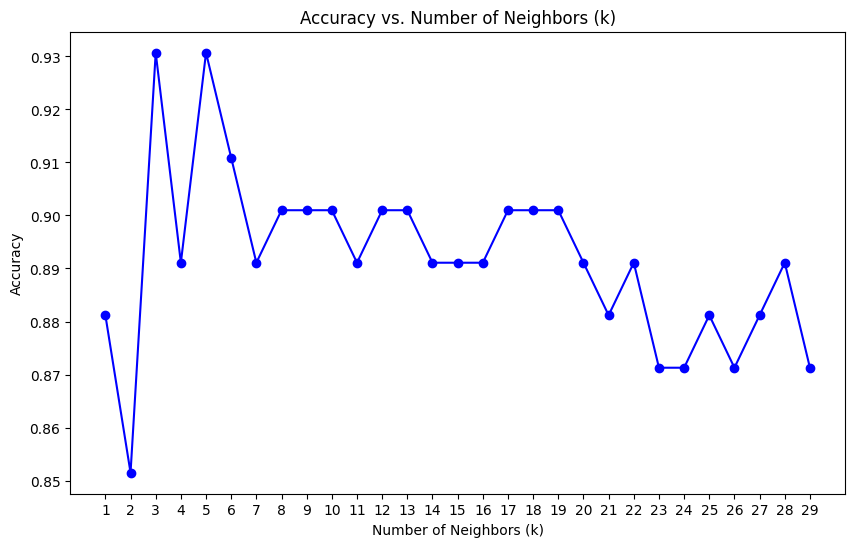

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.show()